In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  

In [2]:
df = pd.read_csv('../data/matrix_of_ratings.csv')
df = df.drop(df.columns[[0]], axis=1)
df.head()

,filename,user0,user1,user2,user3,user4,user5,user6,user7,user8,...,user52,user53,user54,user55,user56,user57,user58,user59,user60,user61
0,snippet1,5.0,5.0,4.0,2.0,1.0,1.0,2.0,1.0,4.0,...,3.0,1.0,3.0,3.0,0.0,4.0,8.0,10.0,2.0,5.0
1,snippet2,1.0,2.0,1.0,2.0,1.0,0.0,2.0,0.0,1.0,...,1.0,3.0,1.0,1.0,2.0,1.0,8.0,5.0,1.0,5.0
2,snippet3,10.0,8.0,7.0,8.0,8.0,10.0,9.0,6.0,8.0,...,10.0,10.0,10.0,8.0,7.0,8.0,10.0,4.0,7.0,7.0
3,snippet4,10.0,8.0,7.0,8.0,9.0,8.0,5.0,8.0,9.0,...,6.0,8.0,9.0,7.0,7.0,0.0,6.0,9.0,8.0,7.0
4,snippet5,8.0,8.0,6.0,8.0,9.0,8.0,5.0,6.0,9.0,...,5.0,7.0,9.0,0.0,8.0,0.0,10.0,0.0,8.0,7.0


# SNS Style

In [17]:
sns.set_context("paper", font_scale=1)
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

# Distribution Plot of All Snippets

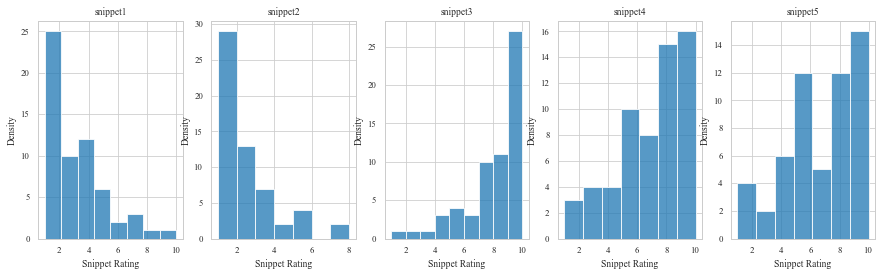

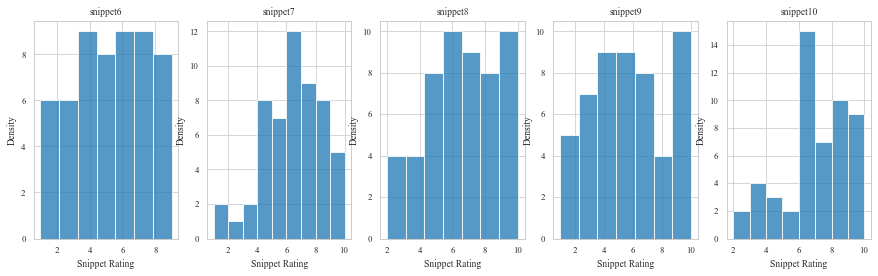

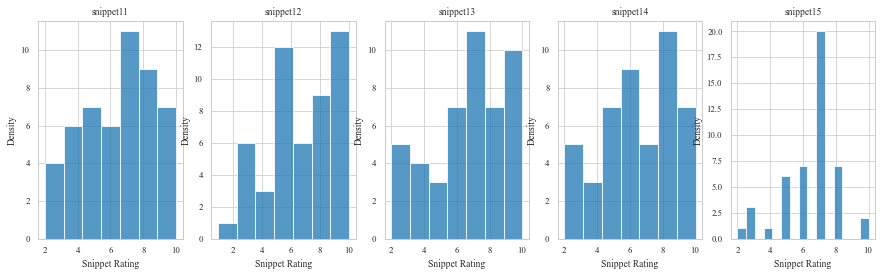

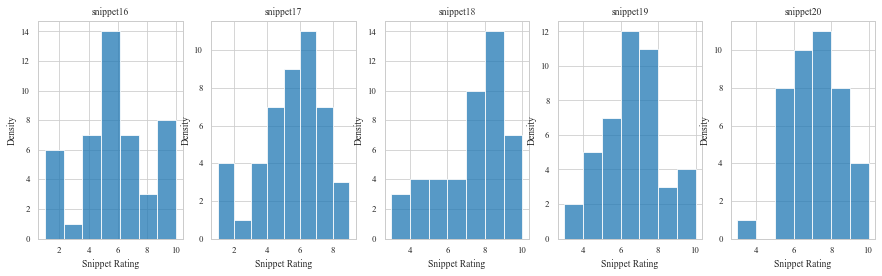

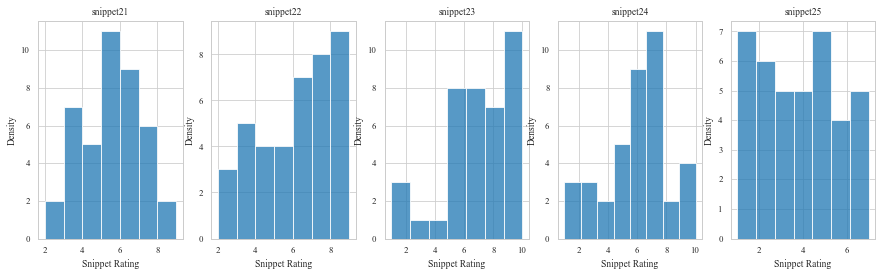

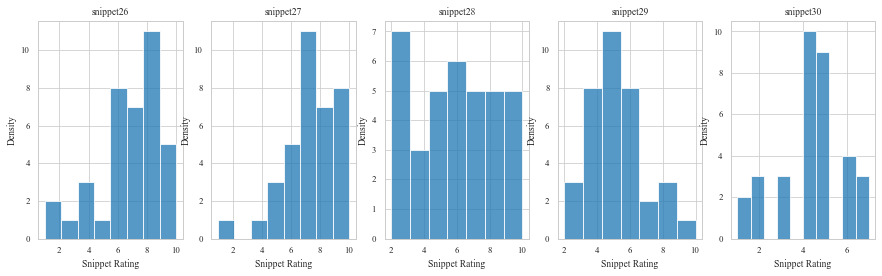

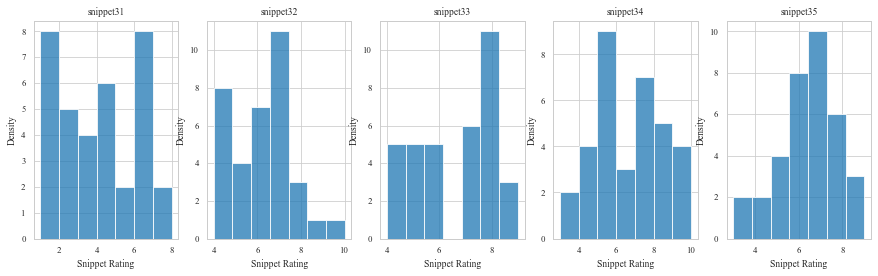

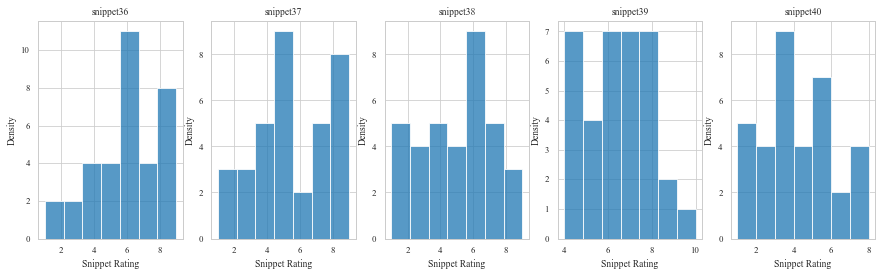

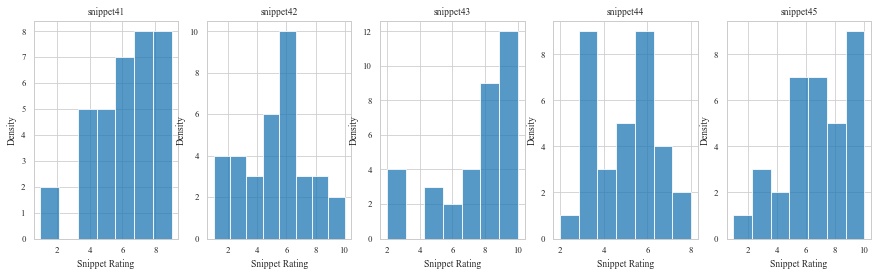

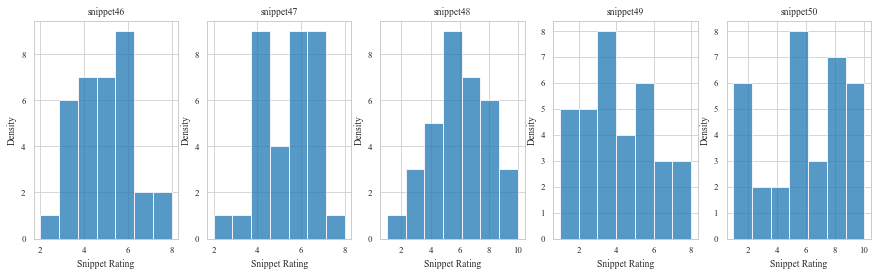

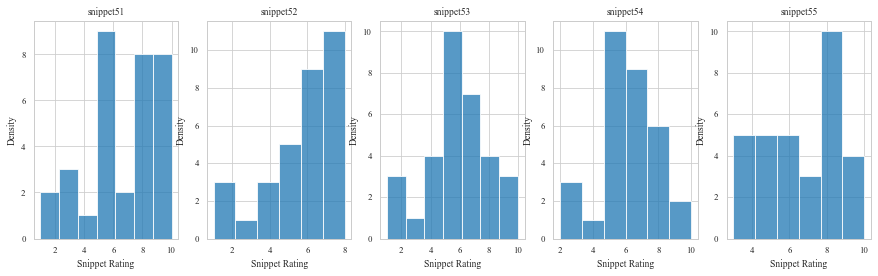

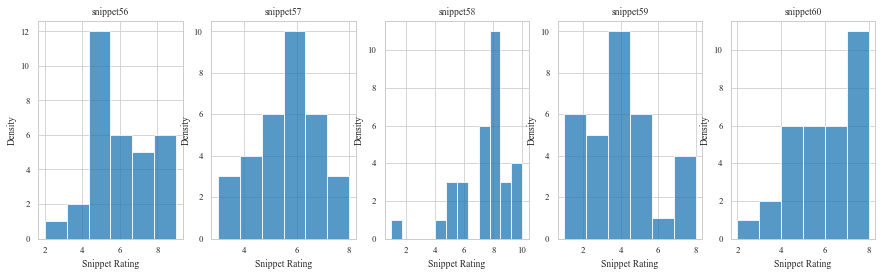

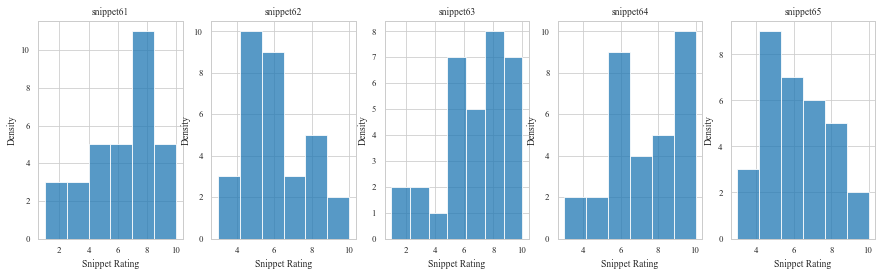

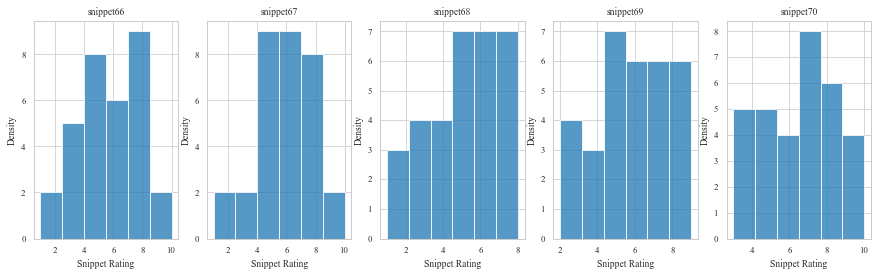

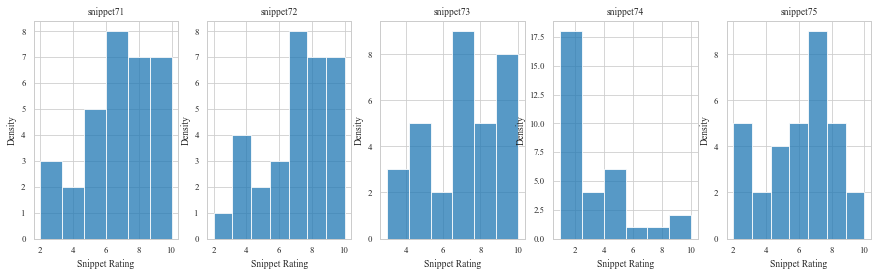

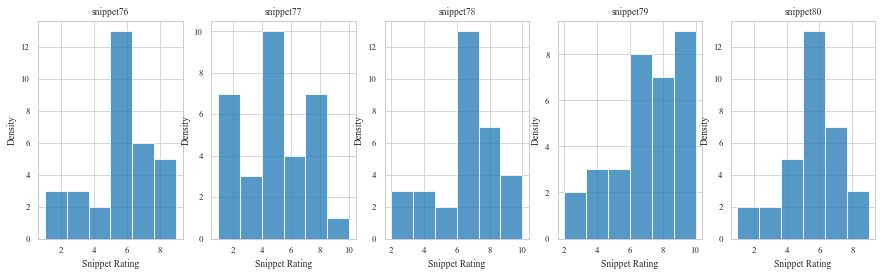

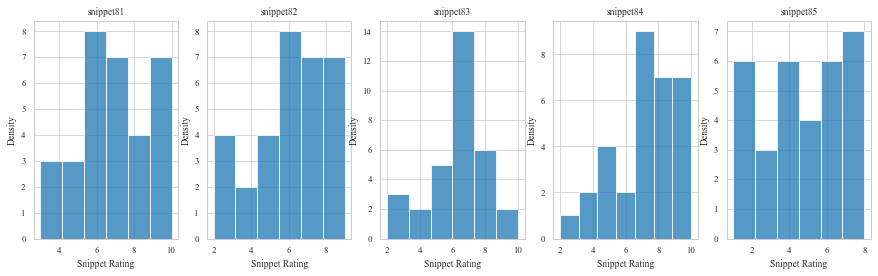

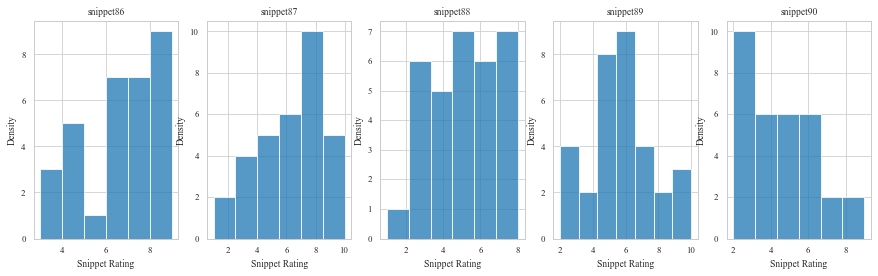

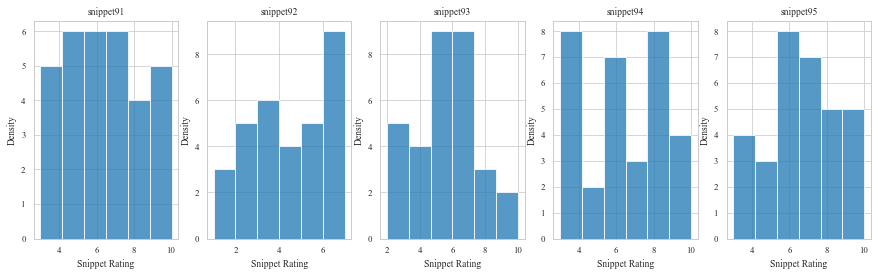

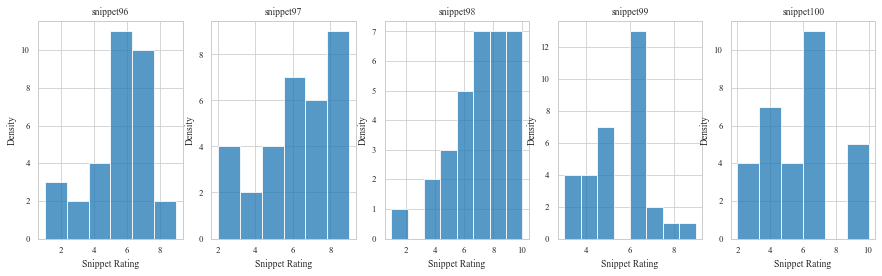

In [4]:
# Plot Distribution of all 100 snippets
for i in range(20):
    
	# Remove "skipped" or 0 ratings
    fig, axs = plt.subplots(1,5)
    fig.set_figwidth(15)
    
    for j in range(5):
        arr = df.iloc[i*5 + j].values
        arr = arr[arr != 0]
        sns.histplot(x = arr[1:], ax=axs[j])
        axs[j].set_title(arr[0])
        axs[j].set_xlabel('Snippet Rating')
        axs[j].set_ylabel('Density')

plt.show()

# Heatmap

In [5]:
df = df.drop(df.columns[[0]], axis=1)

In [6]:
# drop ratings for those who skipped or did not complete the survey
arr = []
for column in df:
    if (0.0 in df[column].values):
    	#print(column ," - Not Full")
    	arr.append(column)

print(len(arr), "People did not fully complete survey")
df_dropped = df.drop(arr, axis = 1)

35 People did not fully complete survey


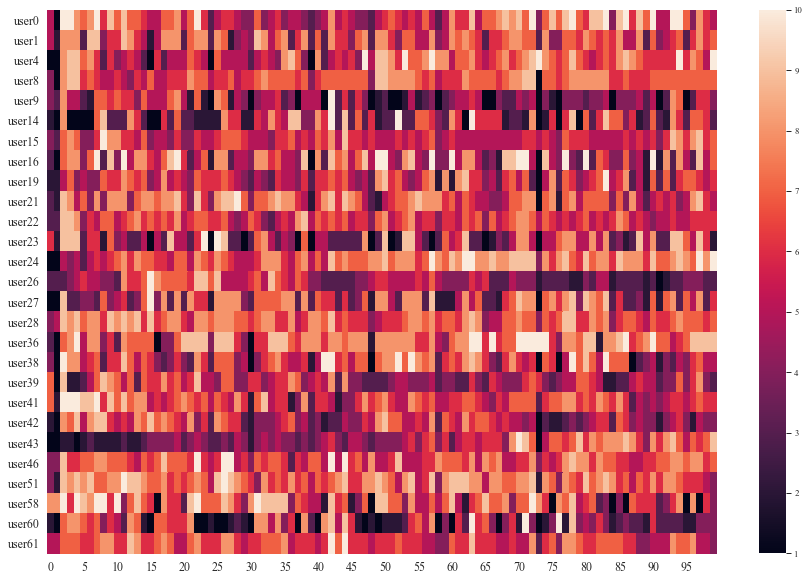

In [7]:
plt.figure(figsize=(15,10))
sns.set_context("paper", font_scale=1)
sns.set_style({'font.family': 'Times New Roman'})

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.heatmap(df_dropped.transpose(), vmin=1, vmax=10, yticklabels=1, xticklabels=5)
plt.show()

# Box-Whisker Plot

In [8]:
# Replace 0 ratings with NaN
df.replace(0, np.nan, inplace=True)

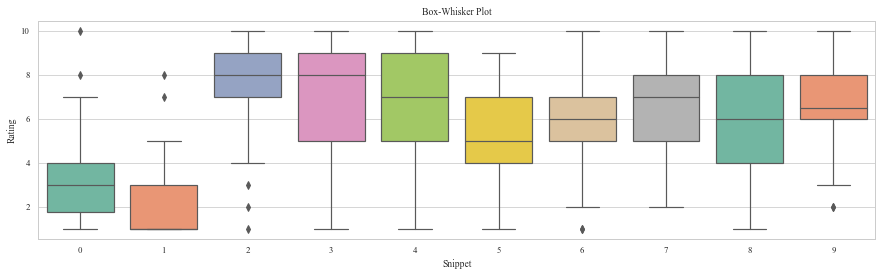

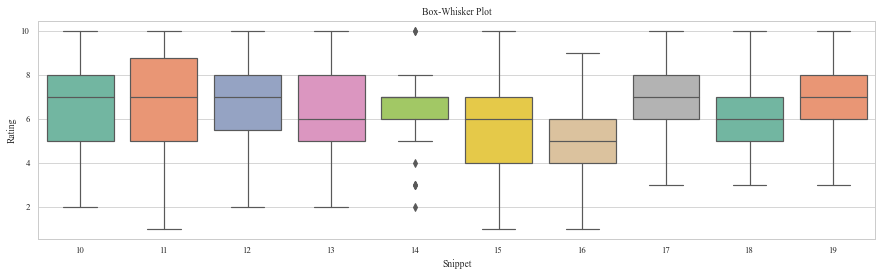

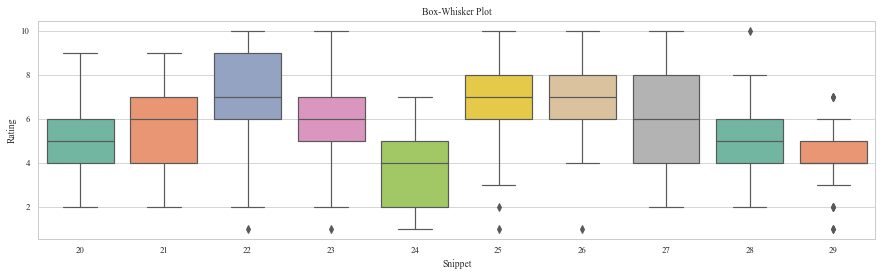

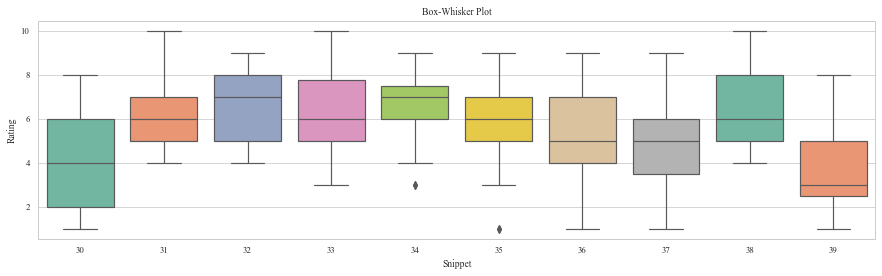

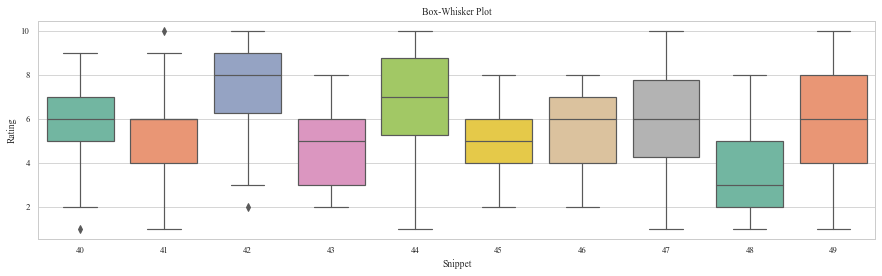

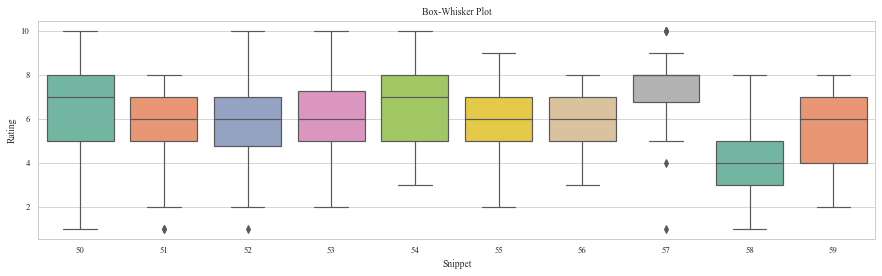

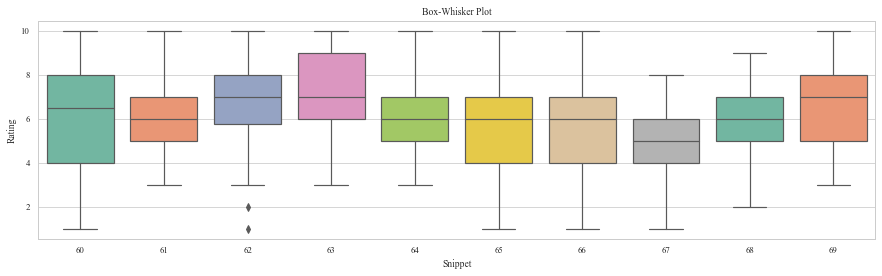

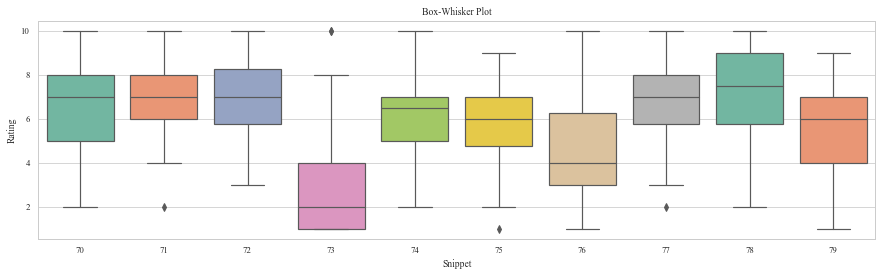

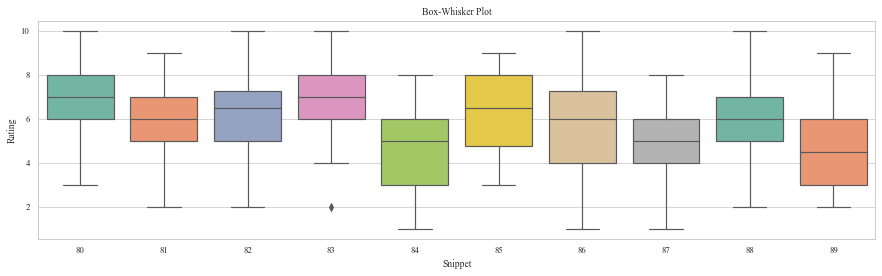

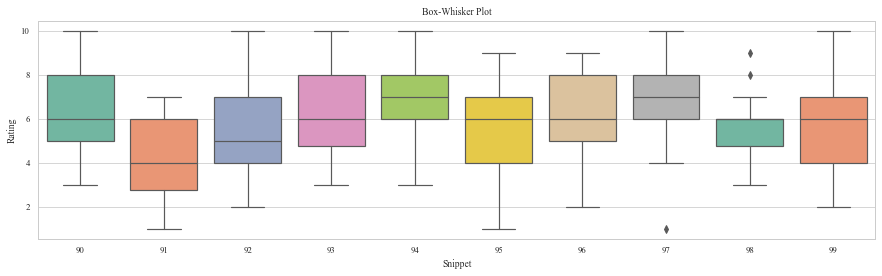

In [9]:
# Generate Box and whisker plots
for i in range(0,10):
	plt.figure(figsize=(15,4))
	plt.title("Box-Whisker Plot") 
	plt.xlabel('Snippet')  
	plt.ylabel('Rating') 
	sns.boxplot(data=df.iloc[i*10:i*10+10].transpose(), palette="Set2")

## Comparing "Good" Snippets with "Bad" Ones

In [10]:
list_of_good = [4,5,7,8,12,16,19,22,24,26,30,33,36,39,48,50,51,54,55,58,63,70,71,72,73,75,81,82,86,87,95]

list_of_bad = []

for i in range(len(list_of_good)):
    list_of_good[i] = list_of_good[i] - 1

counter = 0
for i in range(100):
    if(counter >= len(list_of_good) or list_of_good[counter] != i):
        list_of_bad.append(i)
    else:
        counter +=1


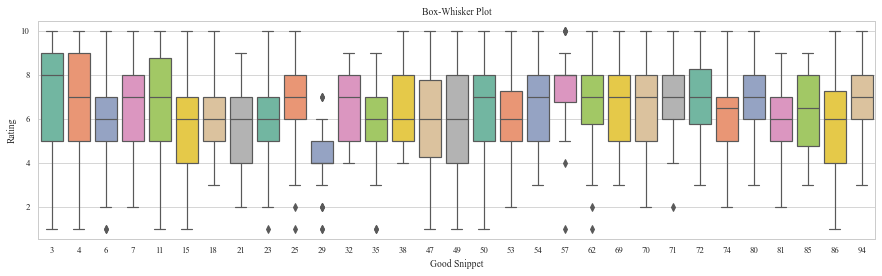

In [11]:
plt.figure(figsize=(15,4))
plt.title("Box-Whisker Plot") 
plt.xlabel('Good Snippet')  
plt.ylabel('Rating') 
sns.boxplot(data=df.iloc[list_of_good].transpose(), palette="Set2")

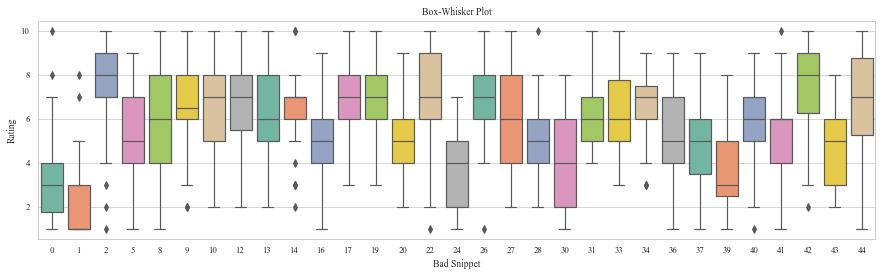

In [12]:
plt.figure(figsize=(15,4))
plt.title("Box-Whisker Plot") 
plt.xlabel('Bad Snippet')  
plt.ylabel('Rating') 
sns.boxplot(data=df.iloc[list_of_bad[0:31]].transpose(), palette="Set2")

In [13]:
df2 = pd.read_csv('../data/average_ratings.csv')
df2 = df2.drop(df2.columns[[0]], axis=1)
df2.head()

print(np.mean(df2.loc[list_of_good]))
print(np.mean((df2.loc[list_of_bad])))

print(np.std(df2.loc[list_of_good]))
print(np.std((df2.loc[list_of_bad])))

snippet rating    6.344711
dtype: float64
snippet rating    5.636777
dtype: float64
snippet rating    0.55597
dtype: float64
snippet rating    1.106149
dtype: float64


# Plotting distribution of average ratings

50


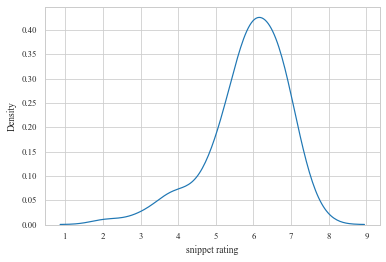

In [14]:
ratings = df2['snippet rating'].values
rounded_ratings = np.round(ratings)
ax = sns.kdeplot(data = df2,x = 'snippet rating')

print(np.sum(ratings > 6.029))

# Plotting distribution of all ratings

In [15]:
df3 = df.drop(df.columns[[0,1]], axis=1)

arr = []
for column in df3:
    arr = np.concatenate([arr,df3[column].values])

arr = arr[arr != 0]

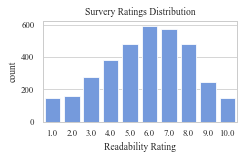

In [16]:
#plt.figure(figsize=(8,6))
fig = plt.figure(figsize=(3.48,2.3))

plt.title("Survery Ratings Distribution")
plt.xlabel('Readability Rating')  
plt.ylabel('Number of Ratings')
sns.countplot(x = arr, color= 'cornflowerblue')

plt.tight_layout()
plt.show()